In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Income information
Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_csv('adult.data.csv',header=None, names=['age','workclass','final_weight','education','education_number','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_class'])

In [4]:
nose.tools.assert_is_not_none(income_data)

How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [5]:
def get_num_people_with_high_income(dataframe):
    dataframe['income_class']=dataframe['income_class'].str.strip()
    income_data_with_high_income=dataframe[dataframe['income_class']=='>50K']
    return income_data_with_high_income.shape[0]
#get_num_people_with_high_income(income_data)

In [6]:
# This cell contains hidden tests

Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

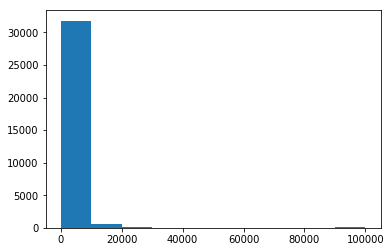

In [7]:
capital_gain=income_data['capital_gain']
plt.hist(capital_gain)
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [8]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    dataframe_people_with_higher_gain=dataframe[dataframe['capital_gain']>=threshold_gain]
    count=dataframe_people_with_higher_gain.shape[0]
    return count

In [9]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

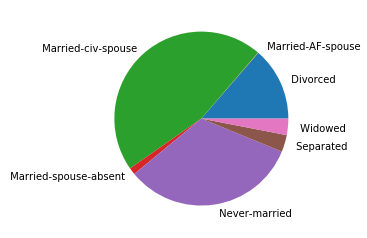

In [10]:
income_data_marital_status=income_data.groupby('marital_status').size().reset_index(name='counts')
plt.pie(income_data_marital_status['counts'],labels=income_data_marital_status['marital_status'])
plt.gca().set_aspect("equal")

Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [11]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    dataframe['marital_status']=dataframe['marital_status'].str.strip()
    income_data_marital_status=dataframe.groupby('marital_status').size().reset_index(name='counts')
    income_data_marital_status=income_data_marital_status.sort_values('counts',ascending=False).reset_index()
    status=income_data_marital_status.iloc[0,1]
    num_people=income_data_marital_status.iloc[0,2]
    return (status, num_people)

In [12]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

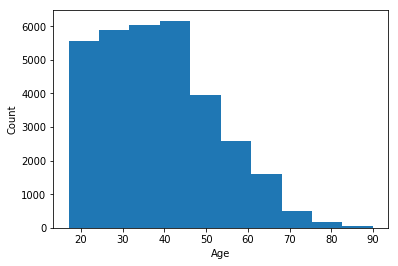

In [13]:
aAges=income_data['age']
plt.hist(aAges)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} <= 30$
2. Middle-aged people: $30 < \text{age} <= 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [14]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    young = dataframe[dataframe['age']<=30].shape[0]
    middle_aged = dataframe[(dataframe['age']>30) & (dataframe['age']<=60)].shape[0]
    old = dataframe[dataframe['age']>60].shape[0]
    return young, middle_aged, old

In [15]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

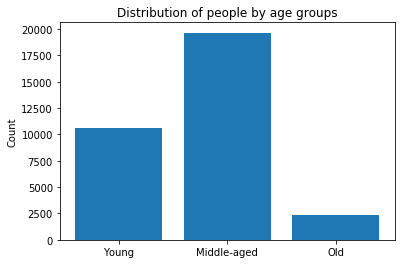

In [16]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [17]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    dataframe['native_country']=dataframe['native_country'].str.strip()
    income_data_second_highest_num_people=dataframe.groupby('native_country').size().reset_index(name='counts')
    income_data_second_highest_num_people=income_data_second_highest_num_people.sort_values('counts',ascending=False)
    num_people=income_data_second_highest_num_people.iloc[1,1]
    country=income_data_second_highest_num_people.iloc[1,0]
    return num_people, country

In [18]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewestt hours).

In [19]:
def get_mean_working_hours_by_income(dataframe):
    df_OccupationMean=dataframe.groupby('occupation').mean() 
    df_OccupationMean=df_OccupationMean.sort_values('hours_per_week',ascending=False).reset_index()
    df_OccupationMean=df_OccupationMean[['occupation','hours_per_week']]
    df_OccupationMean['occupation']=df_OccupationMean['occupation'].str.strip()
    dict_result=pd.Series(df_OccupationMean.hours_per_week.values,index=df_OccupationMean.occupation).to_dict()
    return dict_result

In [20]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

{'Farming-fishing': 46.989939637826964, 'Exec-managerial': 44.987702902115103, 'Transport-moving': 44.656230432060113, 'Protective-serv': 42.870570107858242, 'Prof-specialty': 42.386714975845408, 'Craft-repair': 42.304220541595512, 'Sales': 40.78109589041096, 'Machine-op-inspct': 40.755744255744254, 'Armed-Forces': 40.666666666666664, 'Tech-support': 39.432112068965516, 'Handlers-cleaners': 37.947445255474456, 'Adm-clerical': 37.558355437665782, 'Other-service': 34.701669195751137, 'Priv-house-serv': 32.885906040268459, '?': 31.906131307650568}


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

In [21]:
#plt.figure(figsize = (10, 6))
#plt.title("Weekly hours by occupation")
#plt.barh(range(len(hours)), hours)
#plt.yticks(list(range(len(hours))), hours.index)
#plt.show()